# This is to summarize the feature importance results in the tree-based regression models.

## Models with different parameters and features might have different feature importance results. We will list the feature importances of the best models with GradientBoosting, RandomForest and XGB regression. Besides, the feature importance bar charts of simplified models will be visualized. 

In [18]:
import pandas as pd
import numpy as np

In [19]:
df_feature = pd.read_csv('Ready_for_machine_learning_2019_1_23.csv')
df_feature.head()

,CurrentAcres,TotalGrossArea,FinishedArea,CurrentLandValue,CurrentYardItemsValue,CurrentBuildingValue,Grade,YearBlt,SalePrice,NumofRooms,...,HeatType_188,HeatType_281,HeatType_739,HeatType_3893,HeatType_4255,Foundation_130,Foundation_1219,Foundation_2322,Foundation_2628,Foundation_3199
0,0.05597,1760,840.00000,121600,0,30900.0,5,1912,158000,5,...,0,0,0,1,0,0,0,0,1,0
1,0.08242,2676,1436.00000,94400,700,146800.0,7,1899,231750,7,...,0,0,0,0,1,0,0,0,1,0
2,0.00000,2184,1572.80005,0,0,268000.0,10,1986,381500,6,...,0,0,0,0,1,0,1,0,0,0
3,0.09832,3699,2087.00000,130100,0,210700.0,8,1910,430000,8,...,0,0,0,1,0,0,0,0,1,0
4,0.70154,62852,37977.00000,547700,51800,1306100.0,9,2013,505683,103,...,0,0,0,0,1,0,1,0,0,0


#### Set the target and variables.

In [20]:
X = df_feature.drop(columns=['SalePrice'])
y = df_feature.SalePrice

#### Generate Train and Test sets, and perform scaling.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


### Gradient Boosting Regression

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(loss='huber', n_estimators = 75, max_depth = 6, alpha = 0.9, random_state=0)
reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, reg.predict(X_test))
print("MSE: %.4f" % mse)
print("Square of MSE: %.4f" % np.sqrt(mse))
print("Average Percentage of Abosulute Error: %.4f" % np.mean(np.abs(reg.predict(X_test)-y_test)/y_test))

MSE: 9653647785.6226
Square of MSE: 98252.9785
Average Percentage of Abosulute Error: 0.2018


#### Rank the importance of the features from low to high

In [23]:
feature_importance = reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
print(X.columns[sorted_idx])

Index(['BuildingType_81', 'BuildingType_30', 'BuildingType_24',
       'BuildingType_12', 'BuildingType_60', 'BuildingType_83',
       'BuildingType_31', 'BuildingType_108', 'LandUse_8', 'BuildingType_103',
       'BuildingType_39', 'HeatType_281', 'HeatType_58', 'BuildingType_111',
       'BuildingType_338', 'BuildingType_14', 'BuildingType_110',
       'BuildingType_44', 'HeatFuel_64', 'BuildingType_1389',
       'BuildingType_46', 'LandUse_239', 'BuildingType_101', 'Foundation_2628',
       'BuildingType_147', 'LandUse_43', 'BuildingType_87', 'Foundation_130',
       'LandUse_369', 'BuildingType_162', 'HeatFuel_281', 'LandUse_2150',
       'BuildingType_22', 'BuildingType_144', 'Foundation_3199',
       'BuildingType_219', 'BuildingType_482', 'HeatType_50', 'LandUse_1041',
       'BuildingType_1028', 'Foundation_2322', 'HeatFuel_8187',
       'BuildingType_1193', 'HeatType_3893', 'HeatType_4255', 'HeatType_739',
       'BuildingType_589', 'LandUse_367', 'BuildingType_9', 'LandUse_51

#### Establish a simplified model with fewer features but the same parameter setting

In [24]:
X2=df_feature[['Foundation_1219', 'LandUse_45', 'HeatType_188', 'HeatType_54',
       'BuildingType_291', 'BuildingType_298', 'NumofUnits', 'BuildingType_11',
       'LandUse_285', 'CurrentYardItemsValue', 'NumofRooms', 'CurrentAcres',
       'PropertyCenterPoint_y', 'YearBlt', 'PropertyCenterPoint_x',
       'Depreciation', 'Grade', 'LandUse_117', 'TotalGrossArea',
       'CurrentLandValue', 'CurrentBuildingValue', 'FinishedArea']]
y2=df_feature.SalePrice

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(loss='huber', n_estimators = 75, max_depth = 6, alpha = 0.9, random_state=0)
reg.fit(X2_train, y2_train)
mse = mean_squared_error(y2_test, reg.predict(X2_test))
print("MSE: %.4f" % mse)
print("Square of MSE: %.4f" % np.sqrt(mse))
print("Average Percentage of Abosulute Error: %.4f" % np.mean(np.abs(reg.predict(X2_test)-y2_test)/y2_test))

C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


MSE: 11205087945.9729
Square of MSE: 105854.0880
Average Percentage of Abosulute Error: 0.2027


#### Visualize feature importances in the simplified model (since the feature importance bar chart is NOT visible in the full model)

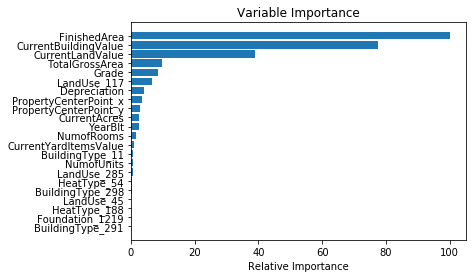

In [25]:
import matplotlib.pyplot as plt
feature_importance = reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Random Forest Regression

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=34, random_state=0)
reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, reg.predict(X_test))
print("MSE: %.4f" % mse)
print("Square of MSE: %.4f" % np.sqrt(mse))
print("Average Percentage of Abosulute Error: %.4f" % np.mean(np.abs(reg.predict(X_test)-y_test)/y_test))

MSE: 11284566340.9465
Square of MSE: 106228.8395
Average Percentage of Abosulute Error: 0.2040


#### Rank the importance of the features from low to high

In [27]:
feature_importance = reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
print(X.columns[sorted_idx])

Index(['LandUse_8', 'BuildingType_31', 'BuildingType_44', 'BuildingType_24',
       'HeatType_58', 'BuildingType_12', 'Foundation_130', 'BuildingType_14',
       'BuildingType_103', 'BuildingType_30', 'HeatFuel_64', 'BuildingType_60',
       'BuildingType_46', 'BuildingType_9', 'BuildingType_101', 'LandUse_45',
       'BuildingType_22', 'BuildingType_39', 'BuildingType_108',
       'BuildingType_110', 'BuildingType_111', 'BuildingType_87',
       'BuildingType_81', 'LandUse_43', 'HeatType_281', 'BuildingType_11',
       'HeatType_50', 'BuildingType_8', 'HeatFuel_281', 'BuildingType_83',
       'BuildingType_162', 'BuildingType_482', 'BuildingType_147',
       'BuildingType_338', 'LandUse_367', 'BuildingType_589', 'LandUse_2150',
       'HeatFuel_1039', 'BuildingType_144', 'LandUse_239', 'BuildingType_1389',
       'LandUse_1041', 'HeatType_54', 'BuildingType_1193', 'LandUse_5176',
       'BuildingType_1028', 'BuildingType_2168', 'BuildingType_291',
       'Foundation_3199', 'Foundation

#### Establish a simplified model with fewer features but the same parameter setting

In [28]:
X2=df_feature[['HeatType_4255', 'HeatFuel_8187', 'HeatType_3893', 'BuildingType_298',
       'Foundation_2628', 'CurrentYardItemsValue', 'YearBlt', 'LandUse_117',
       'Grade', 'PropertyCenterPoint_y', 'Depreciation', 'NumofRooms',
       'PropertyCenterPoint_x', 'CurrentAcres', 'NumofUnits', 'FinishedArea',
       'TotalGrossArea', 'CurrentLandValue', 'CurrentBuildingValue']]
y2=df_feature.SalePrice

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=34, random_state=0)
reg.fit(X2_train, y2_train)
mse = mean_squared_error(y2_test, reg.predict(X2_test))
print("MSE: %.4f" % mse)
print("Square of MSE: %.4f" % np.sqrt(mse))
print("Average Percentage of Abosulute Error: %.4f" % np.mean(np.abs(reg.predict(X2_test)-y2_test)/y2_test))

C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


MSE: 11372684198.3776
Square of MSE: 106642.7878
Average Percentage of Abosulute Error: 0.2029


#### Visualize feature importances in the simplified model (since the feature importance bar chart is NOT visible in the full model)

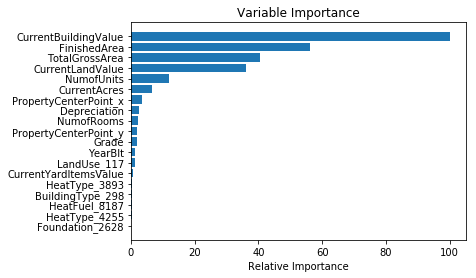

In [29]:
import matplotlib.pyplot as plt
feature_importance = reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### XGBoosting Regression

#### Initialize the best XGB Regression model. Recall that it does NOT take all features!

In [32]:
X2=df_feature[['LandUse_117', 'HeatFuel_64',
       'LandUse_285', 'HeatType_54', 'BuildingType_144', 'BuildingType_298',
       'NumofUnits', 'CurrentYardItemsValue', 'NumofRooms', 'Grade', 'YearBlt',
       'FinishedArea', 'Depreciation', 'PropertyCenterPoint_y',
       'PropertyCenterPoint_x', 'CurrentAcres', 'TotalGrossArea',
       'CurrentLandValue', 'CurrentBuildingValue']]
y2=df_feature.SalePrice
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

import xgboost as xgb
from sklearn.metrics import mean_squared_error
reg = xgb.XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=50, random_state=0)
reg.fit(X2_train, y2_train)
mse = mean_squared_error(y2_test, reg.predict(X2_test))
print("MSE: %.4f" % mse)
print("Square of MSE: %.4f" % np.sqrt(mse))
print("Average Percentage of Abosulute Error: %.4f" % np.mean(np.abs(reg.predict(X2_test)-y2_test)/y2_test))

C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


MSE: 9540009587.4448
Square of MSE: 97672.9727
Average Percentage of Abosulute Error: 0.2048


#### Visualize feature importances.

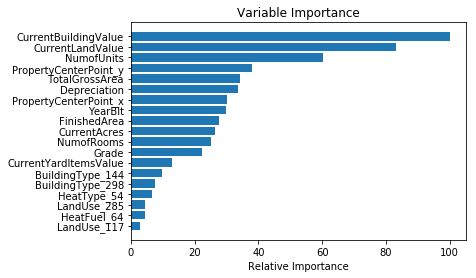

In [33]:
import matplotlib.pyplot as plt
feature_importance = reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Conclusions: 
#### 1.CurrentBuildingValue is always in the top 2 of the most important features(in most cases, it is No.1). 
#### 2.Other important features are CurrentLandValue, FinishedArea, TotalGrossArea, CurrentAcres, PropertyCenterPoint_x, PropertyCenterPoint_y. 
#### 3.The feature LandUse117 is of some use but is of less importance than the most important features in Random Forest Regression and XGB Regression. However, LandUse117 is very important in Gradient Boosting Regression.  